# This project aims to predict housing prices based on historic data of previously sold houses. Data with 20K rows

In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from pandas_profiling import ProfileReport as pr



In [2]:
#loading the data

raw_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
raw_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5272200045,20141113T000000,3,1.50,1000,6914,1.0,0,0,3,...,1000,0,1947,0,98125,47.7144,-122.319,1000,6947,378000.0
19996,9578500790,20141111T000000,3,2.50,3087,5002,2.0,0,0,3,...,3087,0,2014,0,98023,47.2974,-122.349,2927,5183,399950.0
19997,7202350480,20140930T000000,3,2.50,2120,4780,2.0,0,0,3,...,2120,0,2004,0,98053,47.6810,-122.032,1690,2650,575000.0
19998,1723049033,20140620T000000,1,0.75,380,15000,1.0,0,0,3,...,380,0,1963,0,98168,47.4810,-122.323,1170,15000,245000.0


In [3]:
#checking the data type of all collumns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [4]:
#there are 20000 ids in this dataset
raw_data.count()

id               20000
date             20000
bedrooms         20000
bathrooms        20000
sqft_living      20000
sqft_lot         20000
floors           20000
waterfront       20000
view             20000
condition        20000
grade            20000
sqft_above       20000
sqft_basement    20000
yr_built         20000
yr_renovated     20000
zipcode          20000
lat              20000
long             20000
sqft_living15    20000
sqft_lot15       20000
price            20000
dtype: int64

In [5]:
#there sis no offical missing value 
raw_data.isna().any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [6]:
"""#this shows that there is missing information in this feature. I will replace 0 with official nan
date = raw_data["yr_renovated"]
raw_data["yr_renovated"]=raw_data["yr_renovated"].replace(0,np.nan)
#"raw_data["yr_renovated"].value_counts()"
raw_data["yr_renovated"]
for i in raw_data["yr_renovated"]:
    print(i)"""


'#this shows that there is missing information in this feature. I will replace 0 with official nan\ndate = raw_data["yr_renovated"]\nraw_data["yr_renovated"]=raw_data["yr_renovated"].replace(0,np.nan)\n#"raw_data["yr_renovated"].value_counts()"\nraw_data["yr_renovated"]\nfor i in raw_data["yr_renovated"]:\n    print(i)'

In [ ]:
#  Data report



#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

 



 

profile = pr(raw_data)

profile.to_notebook_iframe()

I found that the year renovated had most of its dates as 0, so I replaced them with NAN.

In [ ]:
#Question 2 =  Which property types are weighing most heavily in the house prices predicted by your model

#Feature Seleting technic 

In [ ]:
#This will spit my raw_data into 5 sets
shuffled = raw_data.sample(frac=1)
result = np.array_split(shuffled, 4)  

#this will show the separate sets
for part in result:
    print(part,'\n')


#I am choosing the first set to work with
splited = pd.DataFrame(result[0])


In [55]:
#my X and Y variables
#I had to drop the collumn "long" because it had negative values and the model threw an error becuase of that
#note: yr_renovated has most of its entries as 0, which could have a negative effect in out model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15',]
X = splited[features]  #independent columns
y = splited["price"]

In [56]:
#find out which column has negative values in the entire dataset
#long column 
for i in features:
    for b in raw_data[i]:
        if b < 0:
            print(i)

## First Method Univariate Selection

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [47]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [52]:
featureScores.sort_values(by="Score",ascending = False)


,Specs,Score
3,sqft_lot,1.441075e+08
15,sqft_lot15,9.568419e+07
12,yr_renovated,3.929422e+06
10,sqft_basement,1.571703e+06
2,sqft_living,1.540573e+06
9,sqft_above,1.305158e+06
14,sqft_living15,7.765858e+05
6,view,6.882302e+03
5,waterfront,2.283436e+03
11,yr_built,8.388105e+02


## Second Method Feature Importance

In [53]:
X =  splited[features]  #independent columns
y = splited["price"]   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

[0.04786569 0.06074615 0.10163977 0.10649529 0.02158066 0.00174977
 0.01483619 0.03768219 0.03504919 0.10379253 0.04900259 0.10173303
 0.00916119 0.0970795  0.10741071 0.10417556]


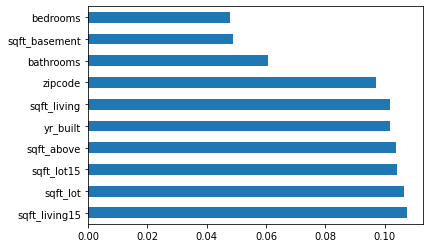

In [50]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Third Method Correlation Matrix with Heatmap

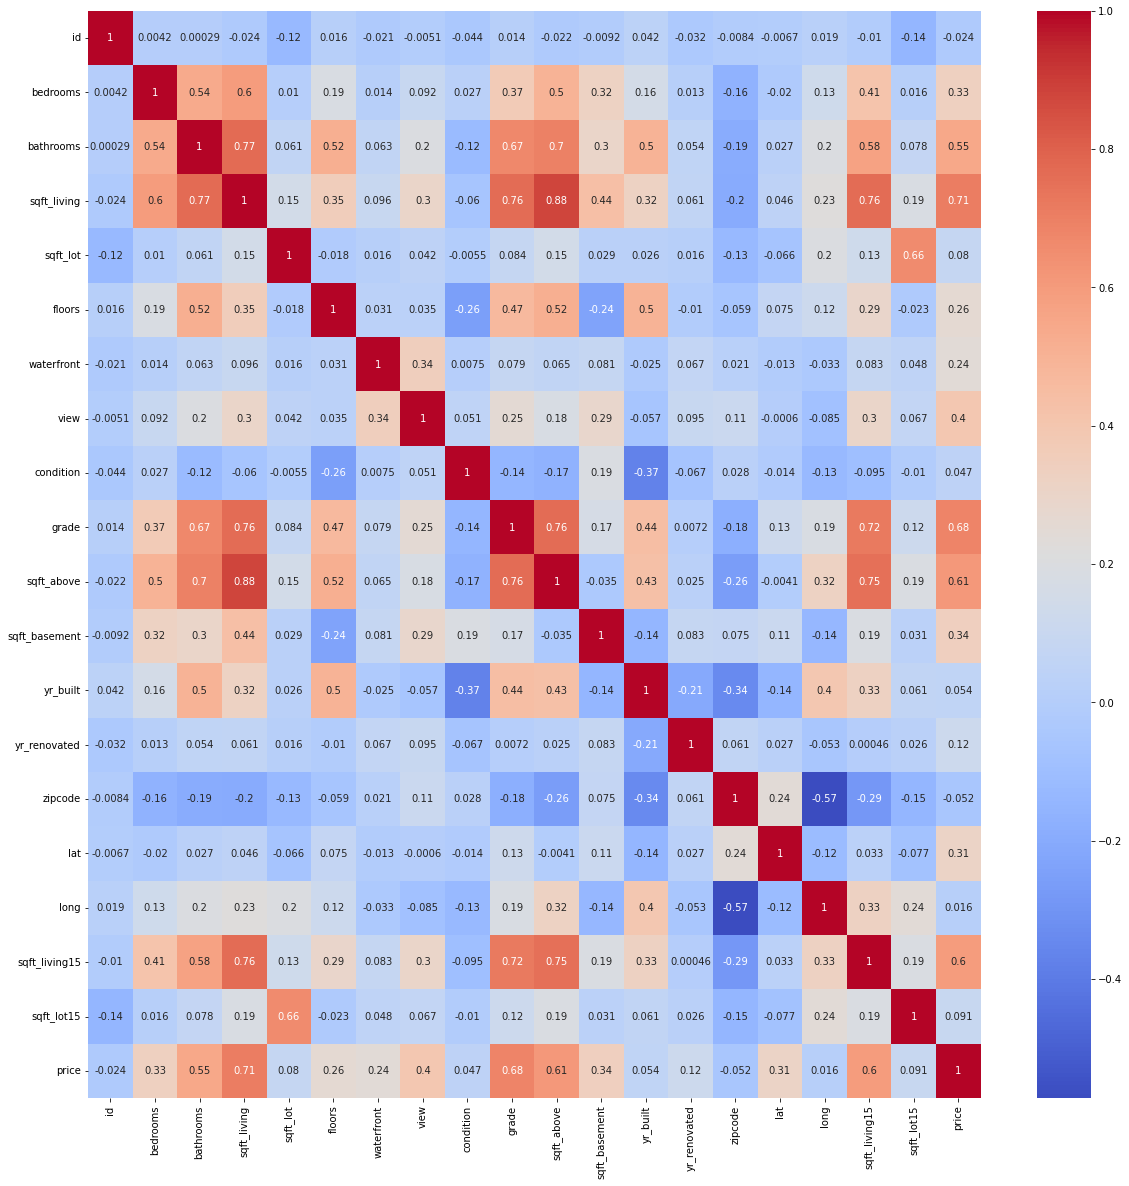

In [58]:

import seaborn as sns
X =  splited[features]  #independent columns
y = splited["price"]  #target column 

  
#get correlations of each features in dataset
corrmat = splited.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(splited[top_corr_features].corr(),annot=True,cmap="coolwarm")

XGBoost Model

In [25]:
# Import the libraries we need 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [26]:
X = raw_data[features]

y = raw_data["price"] 

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state= 12)

In [27]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([240899.92, 557548.6 , 202795.22, ..., 617651.4 , 280321.62,
       571017.4 ], dtype=float32)

In [29]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import mean_squared_error

result = mean_squared_error(y_test, predictions, squared=False)
result

134010.50028589292